In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')
df.head()


C:\Users\pauls\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [15]:
df['age'].value_counts()

?         263
24         47
22         43
21         41
30         40
         ... 
66          1
0.6667      1
76          1
67          1
26.5        1
Name: age, Length: 99, dtype: int64

In [2]:
import numpy as np
for c in ['age', 'fare']:
    df[c] = df[c].replace(('?'), (np.nan)).astype(float)

In [3]:
def bin_age(age):
    if age < 13:
        return 1
    elif age < 19:
        return 2
    else:
        return 3

df['AGEBIN'] = df['age'].apply(bin_age)
df['AGEBIN'].value_counts()

AGEBIN
3    1113
2     102
1      94
Name: count, dtype: int64

In [22]:
df['age'].isnull().sum()

263

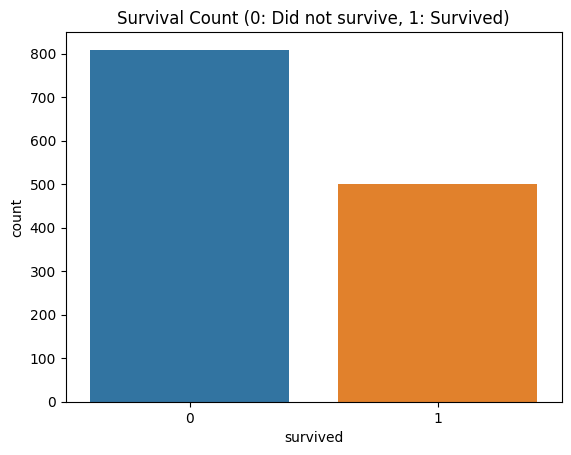

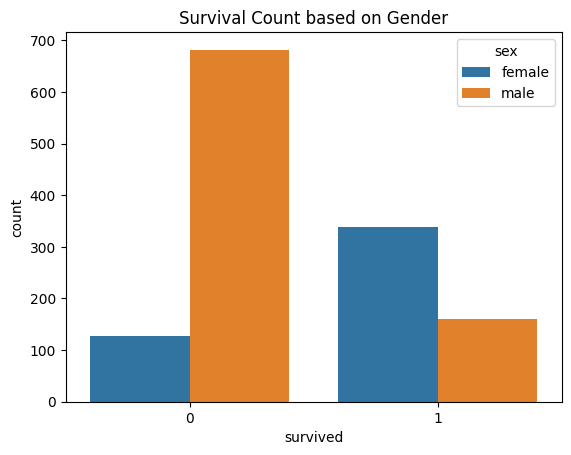

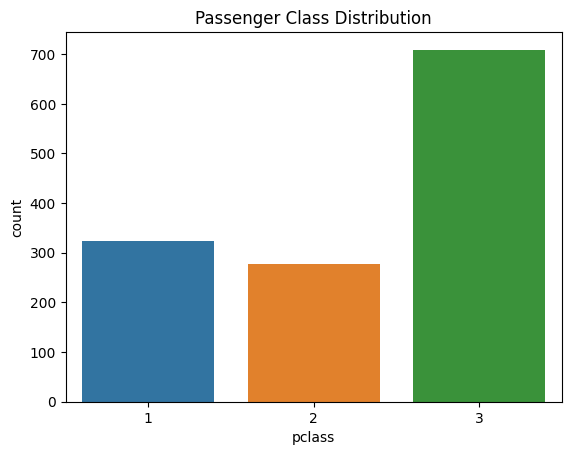

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

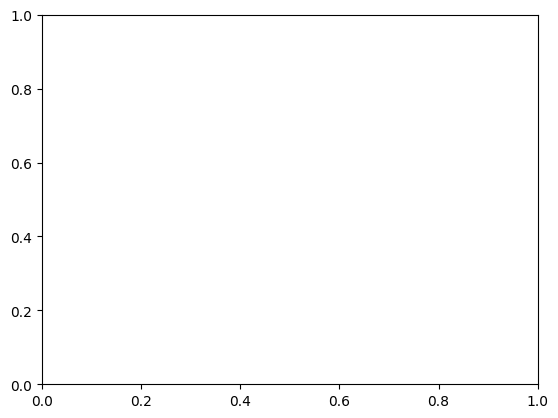

In [4]:
# Display the first few rows of the dataset
df.head()

# Data Exploration and Visualization

# Countplot of Survival
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0: Did not survive, 1: Survived)')
plt.show()

# Countplot of Survival based on Gender
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival Count based on Gender')
plt.show()

# Distribution of Passenger Classes
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Age Distribution
sns.histplot(df['age'].dropna(), bins=30, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Fare Distribution
sns.histplot(df['fare'], bins=30, kde=False)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()



In [5]:
# Data Cleaning and Feature Engineering

# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df.dropna(subset=['embarked'], inplace=True)

# Feature: Family Size
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# Feature: Alone (1 if alone, 0 if with family)
df['Alone'] = (df['FamilySize'] == 1).astype(int)

df.head()

df['embarked'].value_counts()

C:\Users\pauls\AppData\Local\Temp/ipykernel_19092/266644409.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\pauls\AppData\Local\Temp/ipykernel_19092/266644409.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

embarked
S    914
C    270
Q    123
?      2
Name: count, dtype: int64

In [67]:
pd.set_option('display.max_columns', None)
pd.crosstab(df['survived'], df['boat'])

boat,1,10,11,12,13,13 15,13 15 B,14,15,15 16,16,2,3,4,5,5 7,5 9,6,7,8,8 10,9,?,A,B,C,C D,D
survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800,4,1,1,0,1
1,5,29,25,18,39,2,1,32,37,1,23,13,26,31,27,2,1,20,23,23,1,25,23,7,8,37,2,19


In [6]:
# Encoding categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['sex', 'embarked', 'cabin', ],) #drop_first=True
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,boat,body,...,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,2,?,...,False,False,False,False,False,False,False,False,False,False
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,11,?,...,False,False,False,False,False,False,False,False,False,False
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,?,?,...,False,False,False,False,False,False,False,False,False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,?,135,...,False,False,False,False,False,False,False,False,False,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,?,?,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.drop(['home.dest', 'name', 'boat', 'body', 'ticket', ], axis=1, inplace=True)

In [8]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,AGEBIN,FamilySize,Alone,sex_female,...,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
pclass,1.000000,-0.312469,-0.377908,0.060832,0.018322,-0.558683,-0.138693,0.050027,0.147393,-0.124617,...,0.023279,0.023279,0.032934,0.032934,-0.019493,-0.019493,0.023279,-0.019493,0.052133,-0.042750
survived,-0.312469,1.000000,-0.043818,-0.027825,0.082660,0.244414,-0.106912,0.026876,-0.201719,0.528693,...,0.035171,0.035171,0.009503,-0.030753,0.013449,0.070423,-0.021737,0.070423,0.027787,-0.021737
age,-0.377908,-0.043818,1.000000,-0.189972,-0.125851,0.178182,0.625154,-0.193742,0.107076,-0.053664,...,-0.009652,-0.003222,0.012120,-0.022752,-0.054196,-0.009670,-0.003222,-0.069753,-0.084016,0.033215
sibsp,0.060832,-0.027825,-0.189972,1.000000,0.373587,0.160349,-0.321456,0.861952,-0.591077,0.109609,...,-0.013247,0.013308,-0.018741,-0.018741,0.000061,-0.026524,-0.013247,0.053231,0.006015,-0.013247
parch,0.018322,0.082660,-0.125851,0.373587,1.000000,0.221635,-0.305208,0.792296,-0.549022,0.213125,...,-0.012304,0.019653,-0.017408,-0.017408,0.039350,-0.024637,-0.012304,0.071344,0.058325,-0.012304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cabin_F33,-0.019493,0.070423,-0.009670,-0.026524,-0.024637,-0.023716,0.021816,-0.030912,0.044874,0.074464,...,-0.001531,-0.001531,-0.002166,-0.002166,-0.003065,1.000000,-0.001531,-0.003065,-0.003428,-0.001531
cabin_F38,0.023279,-0.021737,-0.003222,-0.013247,-0.012304,-0.013649,0.010896,-0.015438,0.022411,-0.020558,...,-0.000765,-0.000765,-0.001082,-0.001082,-0.001531,-0.001531,1.000000,-0.001531,-0.001712,-0.000765
cabin_F4,-0.019493,0.070423,-0.069753,0.053231,0.071344,0.006122,-0.125896,0.074007,-0.068305,0.045557,...,-0.001531,-0.001531,-0.002166,-0.002166,-0.003065,-0.003065,-0.001531,1.000000,-0.003428,-0.001531
cabin_G6,0.052133,0.027787,-0.084016,0.006015,0.058325,-0.022838,-0.107767,0.035835,-0.076397,0.083285,...,-0.001712,-0.001712,-0.002422,-0.002422,-0.003428,-0.003428,-0.001712,-0.003428,1.000000,-0.001712


In [58]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [9]:

# Drop unnecessary columns


# Train-Test Split
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Machine Learning Model (Logistic Regression)
logreg_model = LogisticRegression(random_state=42, class_weight='balanced')
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)
y_prob = logreg_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.767175572519084

Confusion Matrix:
[[118  26]
 [ 35  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       144
           1       0.76      0.70      0.73       118

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



In [45]:
 0       0.76      0.88      0.81       144
           1       0.81      0.66      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

array([[0.92884973, 0.07115027],
       [0.86108565, 0.13891435],
       [0.92063704, 0.07936296],
       [0.92061671, 0.07938329],
       [0.90444434, 0.09555566],
       [0.74586198, 0.25413802],
       [0.91690009, 0.08309991],
       [0.84287155, 0.15712845],
       [0.91339886, 0.08660114],
       [0.12191223, 0.87808777],
       [0.998609  , 0.001391  ],
       [0.90556752, 0.09443248],
       [0.16964113, 0.83035887],
       [0.92063704, 0.07936296],
       [0.92651926, 0.07348074],
       [0.42375762, 0.57624238],
       [0.87727559, 0.12272441],
       [0.4657486 , 0.5342514 ],
       [0.11986724, 0.88013276],
       [0.93434147, 0.06565853],
       [0.44831033, 0.55168967],
       [0.71411011, 0.28588989],
       [0.91168469, 0.08831531],
       [0.71307828, 0.28692172],
       [0.86609159, 0.13390841],
       [0.12612391, 0.87387609],
       [0.86949853, 0.13050147],
       [0.27291802, 0.72708198],
       [0.40755826, 0.59244174],
       [0.12311024, 0.87688976],
       [0.

In [56]:
y_prob[:,1]

array([0.07289199, 0.18443542, 0.0787362 , 0.13850916, 0.10954851,
       0.24623553, 0.09386374, 0.16952638, 0.08549637, 0.88992768,
       0.00402465, 0.09116236, 0.80014588, 0.09386035, 0.07676685,
       0.6117655 , 0.18002365, 0.5532955 , 0.8543567 , 0.08659556,
       0.5809227 , 0.30605986, 0.10362499, 0.3005889 , 0.156965  ,
       0.78980735, 0.12498598, 0.72822691, 0.60522255, 0.84574944,
       0.2578905 , 0.34842512, 0.50747081, 0.84767778, 0.24565227,
       0.08725727, 0.8992547 , 0.15105957, 0.90592831, 0.41638742,
       0.70939539, 0.10886548, 0.6497169 , 0.07833771, 0.11728511,
       0.05355028, 0.07790288, 0.60682497, 0.73621078, 0.58022924,
       0.8958703 , 0.05358486, 0.21321385, 0.8673199 , 0.10621325,
       0.22049005, 0.14077046, 0.71693518, 0.08281404, 0.64883451,
       0.14818766, 0.14491251, 0.90813155, 0.22049005, 0.91609045,
       0.90478837, 0.8250446 , 0.06515874, 0.10914648, 0.11708164,
       0.39060188, 0.22548503, 0.10884508, 0.09806114, 0.33531

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

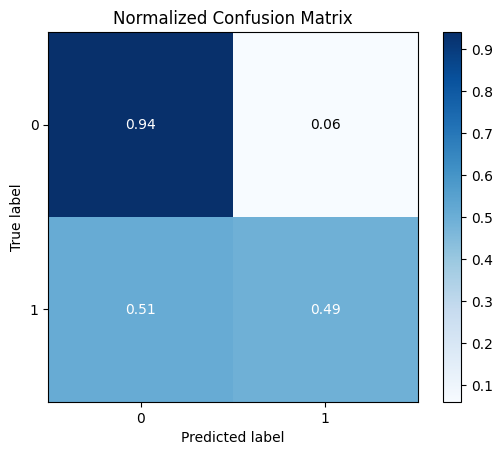

In [11]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_prob[:,1] >= .75, normalize=True)

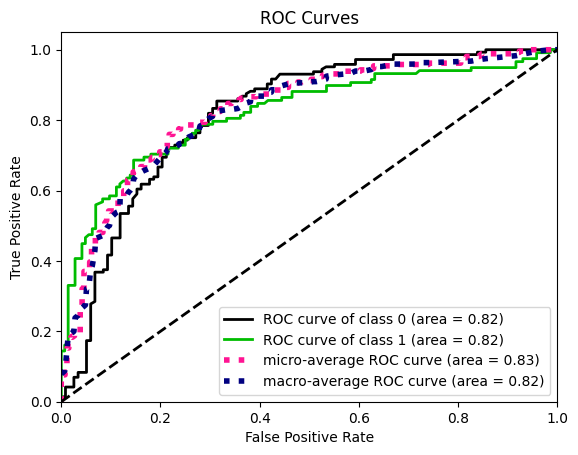

C:\Users\pauls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


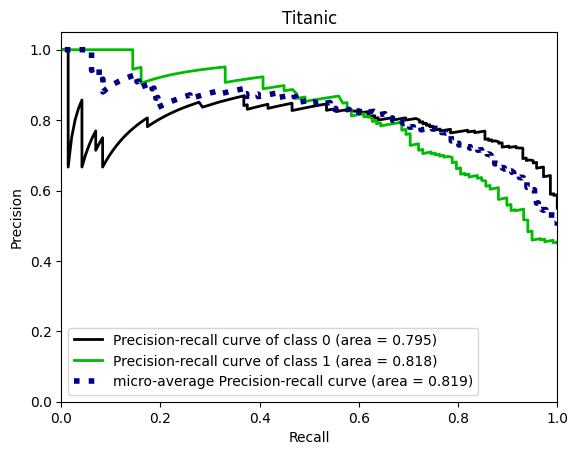

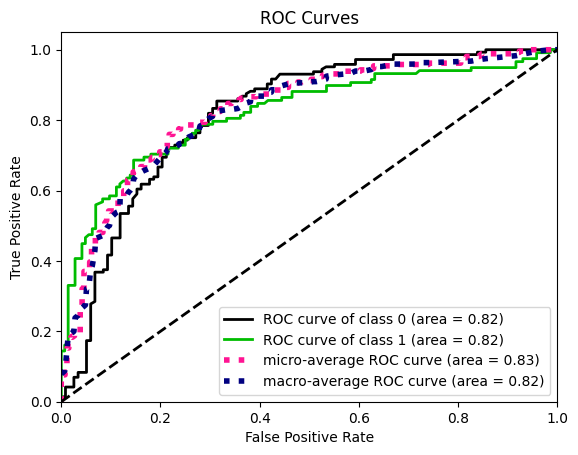

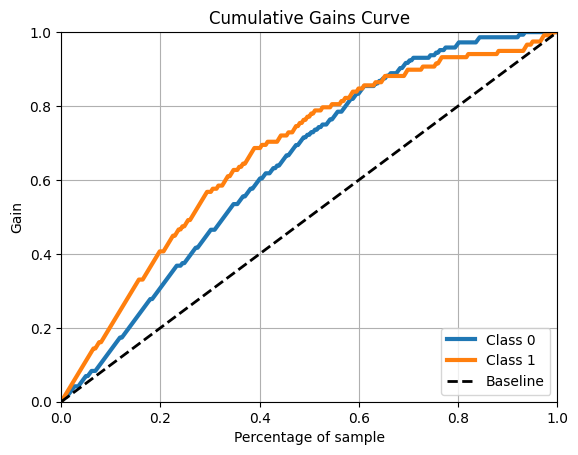

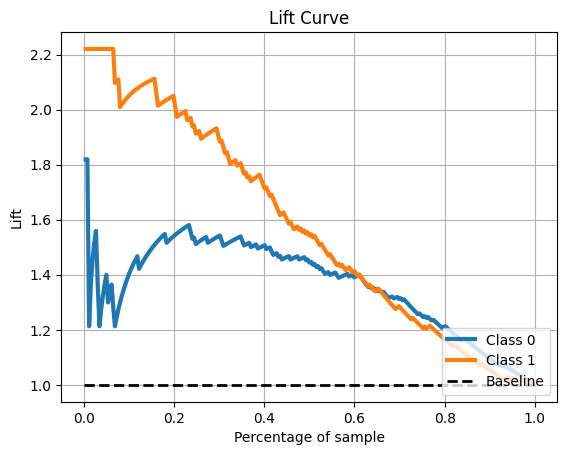

In [12]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_prob)
plt.show()
skplt.metrics.plot_precision_recall_curve(y_test, y_prob,title='Titanic')
plt.show()

skplt.metrics.plot_roc(y_test, y_prob)
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, y_prob)
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_prob)
plt.show()